In [164]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from scipy.sparse import coo_matrix  # for sparse matrix
from matplotlib import pyplot as plt
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix  # for evaluating results

# Bài1

MultinomialNB

In [145]:
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = (["B", "B", "B", "N"])

d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

In [146]:
clf = MultinomialNB()
clf.fit(train_data, label)

MultinomialNB()

In [147]:
print("Prediction class of d5:", str(clf.predict(d5)[0]))
print("Prediction class of d6:", str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Prediction class of d5: B
Prediction class of d6: N
Probability of d5 in each class: [[0.89548823 0.10451177]]
Probability of d6 in each class: [[0.29175335 0.70824665]]


BernoulliNB

In [165]:
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])  # 0 - B, 1 - N

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

clf = BernoulliNB()
# training
clf.fit(train_data, label)
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


# Bài 2

In [148]:
path = "D:/Machine Learning/classroom/week1/ex6DataPrepared/"

train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'

In [149]:
nwords = 2500


def read_data(data_fn, label_fn):
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]

    with open(path + data_fn) as f:
        content = f.readlines()
    content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype=int)

    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])
    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
    # for more information about coo_matrix function
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)), shape=(len(label), nwords))
    return (data, label)

In [150]:
(train_data, train_label) = read_data(train_data_fn, train_label_fn)
(test_data, test_label) = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)

In [151]:
print(str(y_pred))
print(test_label)
print(precision_score(test_label, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Bài 3

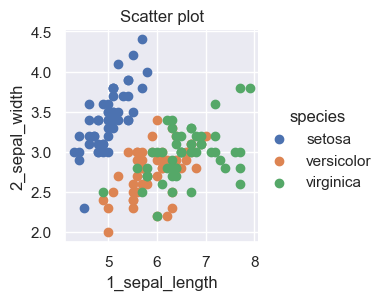

In [172]:
% matplotlib inline
sns.set()

iris = sns.load_dataset("iris")
iris = iris.rename(index=str, columns={'sepal_length': '1_sepal_length', 'sepal_width': '2_sepal_width',
                                       'petal_length': '3_petal_length', 'petal_width': '4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species").map(plt.scatter, "1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width", 'species']]

In [153]:
print(iris)

     1_sepal_length  2_sepal_width  3_petal_length  4_petal_width    species
0               5.1            3.5             1.4            0.2     setosa
1               4.9            3.0             1.4            0.2     setosa
2               4.7            3.2             1.3            0.2     setosa
3               4.6            3.1             1.5            0.2     setosa
4               5.0            3.6             1.4            0.2     setosa
..              ...            ...             ...            ...        ...
145             6.7            3.0             5.2            2.3  virginica
146             6.3            2.5             5.0            1.9  virginica
147             6.5            3.0             5.2            2.0  virginica
148             6.2            3.4             5.4            2.3  virginica
149             5.9            3.0             5.1            1.8  virginica

[150 rows x 5 columns]


In [173]:
def predict_NB_gaussian_class(X, mu_list, std_list, pi_list):
#Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x=X[0], loc=mu_list[p][0][0], scale=std_list[p][0][0])
                 * norm.pdf(x=X[1], loc=mu_list[p][0][1], scale=std_list[p][0][1])
                 * pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)


def predict_Bayes_class(X, mu_list, sigma_list):
#Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)

NameError: name 'norm' is not defined

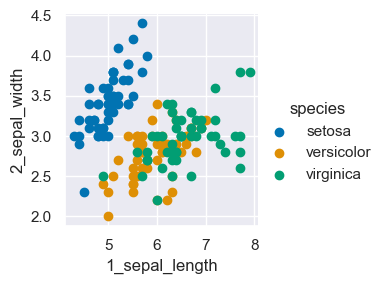

In [177]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values, [1, 2])
std_list = np.split(df1.groupby('species').std().values, [1, 2], axis=0)
pi_list = df1.iloc[:, 2].value_counts().values / len(df1)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(iris, hue="species", palette='colorblind').map(plt.scatter, "1_sepal_length",
                                                                 "2_sepal_width", ).add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array([predict_NB_gaussian_class(np.array([xx, yy]).reshape(-1, 1), mu_list, std_list, pi_list)
               for xx, yy in zip(np.ravel(X), np.ravel(Y))])
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'green', 'red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

In [175]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:, 0:2]
y_labels = df1.iloc[:, 2].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}).copy()
#Fit model
model_sk = GaussianNB(priors=None)
model_sk.fit(X_data, y_labels)
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

C:\Users\Admin\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Admin\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Admin\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Admin\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Admin\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.w

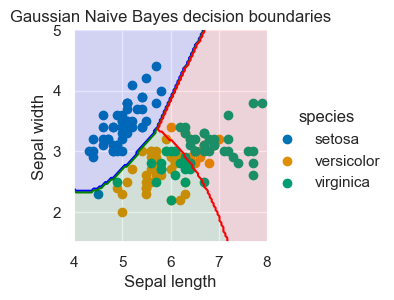

In [176]:
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(iris, hue="species", palette='colorblind').map(plt.scatter, "1_sepal_length",
                                                                 "2_sepal_width", ).add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array([model_sk.predict([[xx, yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)
                                                                 )])
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'green', 'red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

# Bài 4

Đọc file

In [156]:
path_cancer = "D:/Machine Learning/classroom/week1/Cancer_Data/NB_last/datacum.txt"
with open(path_cancer) as f:
    content = f.readlines()
content = [x.strip() for x in content if len(x) > 1]
n = 699
matrix = np.zeros((n, 10), dtype=int)

Lọc lấy ma trận

In [157]:
index_matrix = 0
for i in content:
    if not i.startswith("#") and len(i) > 1:
        a = i.split(",")
        matrix[index_matrix, :] = np.array(
            [int(a[1]), int(a[2]), int(a[3]), int(a[4]), int(a[5]), int(a[6]), int(a[7]), int(a[8]), int(a[9]),
             int(a[10])])
        index_matrix = index_matrix + 1

In [158]:
label = np.zeros((n, 1), dtype=int)
dat = np.zeros((len(content), 9), dtype=int)

test_data_benign = np.zeros((n, 9), dtype=int)
test_label_benign = np.zeros((n, 1), dtype=int)
test_data_malignant = np.zeros((n, 9), dtype=int)
test_label_malignant = np.zeros((n, 1), dtype=int)

Lấy ra data,label và 80 mẫu lành tính, 40 mẫu ác tính

In [159]:
#lấy ra data và label
index = 0
for i in matrix:
    a = i
    label[index, :] = np.array([int(a[0])])
    dat[index, :] = np.array(
        [int(a[1]), int(a[2]), int(a[3]), int(a[4]), int(a[5]), int(a[6]), int(a[7]), int(a[8]), int(a[9])])
    index = index + 1

#80 mẫu lành tính
index_test_benign = 0
for i in matrix:
    a = i
    while index_test_benign <= 79:
        if int(a[0]) == 2:
            test_data_benign[index_test_benign, :] = np.array(
                [int(a[1]), int(a[2]), int(a[3]), int(a[4]), int(a[5]), int(a[6]), int(a[7]), int(a[8]), int(a[9])])
            test_label_benign[index_test_benign, :] = np.array([int(a[0])])
            index_test_benign = index_test_benign + 1
        break
#40 mẫu ác tính
index_test_malignant = 0
for i in matrix:
    a = i
    while index_test_malignant <= 39:
        if int(a[0]) == 4:
            test_data_malignant[index_test_malignant, :] = np.array(
                [int(a[1]), int(a[2]), int(a[3]), int(a[4]), int(a[5]), int(a[6]), int(a[7]), int(a[8]), int(a[9])])
            test_label_malignant[index_test_malignant, :] = np.array([int(a[0])])
            index_test_malignant = index_test_malignant + 1
        break


# xóa các dòng trong matrix có chứa toàn số 0
def deleteZeroRow(array):
    row_sums = array.sum(axis=1)
    zero_sum_rows = np.where(row_sums == 0)[0]
    array = np.delete(array, zero_sum_rows, axis=0)
    return array


label = deleteZeroRow(label)  #699 rows
dat = deleteZeroRow(dat)  #699 rows

test_data_benign = deleteZeroRow(test_data_benign)  #80 rows
test_data_malignant = deleteZeroRow(test_data_malignant)  #40 rows
test_label_malignant = deleteZeroRow(test_label_malignant)
test_label_benign = deleteZeroRow(test_label_benign)

Find the training sample from the initial dataset

In [160]:
#lấy ra tập train phần còn lại sau khi lấy ra tập test/ train = A - test
# train = np.concatenate((label,dat),axis=1)
train = matrix
#gộp 2 ma trận test lại thành 1 để lấy ra phần còn lại

benign = np.concatenate((test_label_benign, test_data_benign), axis=1)  # cả label và data của benign
malignant = np.concatenate((test_label_malignant, test_data_malignant), axis=1)  # cả lable và data của benign

combined_matrix_data = np.concatenate((benign, malignant), axis=0)

#train là ma trận cha, combined_matrix_data là ma trận con, cần tìm ra ma trận có trong ma trận con, ko có trong ma trận con kia
for i in combined_matrix_data:
    position = np.where(i in train)[0]
    train = np.delete(train, position, 0)

In [161]:
train_label = np.zeros((len(train), 1), dtype=int)  # label của tập train
train_data = np.zeros((len(train), 9), dtype=int)  # data của tập train

k = 0
for i in train:
    train_label[k, :] = np.array([int(i[0])])
    train_data[k, :] = np.array(
        [int(i[1]), int(i[2]), int(i[3]), int(i[4]), int(i[5]), int(i[6]), int(i[7]), int(i[8]), int(i[9])])
    k = k + 1

train_label = deleteZeroRow(train_label)
train_data = deleteZeroRow(train_data)
print(train_data.shape)
print(train_label.shape)

(579, 9)
(579, 1)


Training

In [162]:
# chuyển số 2 thành số 0, số 4 thành số 1.
def replacing_label(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 2:
                matrix[i][j] = 0
            elif matrix[i][j] == 4:
                matrix[i][j] = 1
    return matrix


train_label = replacing_label(train_label).ravel()
test_label_malignant = replacing_label(test_label_malignant).ravel()
test_label_benign = replacing_label(test_label_benign).ravel()

test_data = np.concatenate((test_data_benign, test_data_malignant), axis=0)
test_label = np.concatenate((test_label_benign, test_label_malignant), axis=0)
# print(test_data.shape)


clf = MultinomialNB()
clf.fit(train_data, train_label)

MultinomialNB()

Prediction

In [163]:

predict = clf.predict(test_data)

print(accuracy_score(test_label, predict))
print(precision_score(test_label, predict))
print(confusion_matrix(test_label, predict))



0.825
0.8518518518518519
[[76  4]
 [17 23]]
